In [83]:
import random
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [16]:
possible_step = [-1,0,1]
class walker():
    def __init__(self):
        self.x = 0
        self.y = 0
        self.z = 0
        self.trajectory = {'x':[0],'y':[0],'z':[0]}
    
    def get_position(self):
        return [self.x,self.y,self.z]
    
    # Get the displacement from current point to the origin. 
    def get_displacement(self):
        return math.sqrt(self.x**2+self.y**2+self.z**2)

    def step_foward(self):
        self.x = self.x + random.choice(possible_step)
        self.trajectory['x'].append(self.x)
        self.y = self.y + random.choice(possible_step)
        self.trajectory['y'].append(self.y)
        self.z = self.z + random.choice(possible_step)
        self.trajectory['z'].append(self.z)

In [44]:
walkers = [ walker() for i in range(100000)]

In [48]:
for _ in range(100):
    for element in walkers:
        element.step_foward()

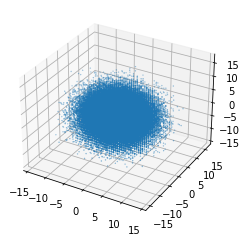

In [49]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter([i.x for i in walkers], [i.y for i in walkers], [i.z for i in walkers],s=0.1)
plt.show()

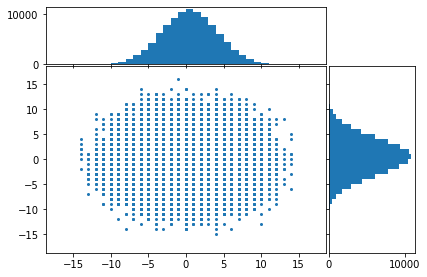

In [59]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

x = [i.x for i in walkers]
y = [i.y for i in walkers]
z = [i.z for i in walkers]

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,s = 4)

    # now determine nice limits by hand:
    binwidth = 1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

fig = plt.figure()

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

scatter_hist(x, y, ax, ax_histx, ax_histy)
plt.show()

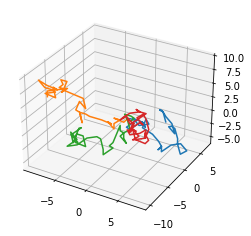

In [68]:
for _ in range(10):
    for element in walkers:
        element.step_foward()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(4):
    ax.plot(walkers[i].trajectory['x'],walkers[i].trajectory['y'],walkers[i].trajectory['z'],)
plt.show()